In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix

%matplotlib inline


In [4]:
DATAPATH = 'mushrooms.csv'

data = pd.read_csv(DATAPATH)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


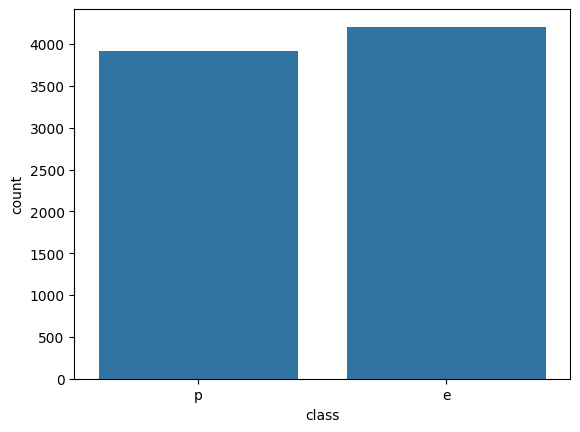

In [5]:
x = data['class']
ax = sns.countplot(x=x, data=data)

In [6]:
def plot_data(hue, data):
    for i, col in enumerate(data.columns):
        plt.figure(i)
        ax = sns.countplot(x=data[col], hue=hue, data=data)

##Preprocessing

In [7]:
for col in data.columns:
    print(f"{col}: {data[col].isnull().sum()}")

class: 0
cap-shape: 0
cap-surface: 0
cap-color: 0
bruises: 0
odor: 0
gill-attachment: 0
gill-spacing: 0
gill-size: 0
gill-color: 0
stalk-shape: 0
stalk-root: 0
stalk-surface-above-ring: 0
stalk-surface-below-ring: 0
stalk-color-above-ring: 0
stalk-color-below-ring: 0
veil-type: 0
veil-color: 0
ring-number: 0
ring-type: 0
spore-print-color: 0
population: 0
habitat: 0


In [8]:
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
encoded_data = pd.get_dummies(data)
encoded_data.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,False,False,True,False
1,0,False,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,1,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,0,False,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False


##Model

In [12]:
y = data['class'].values.reshape(-1, 1)
X = encoded_data.drop(['class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logistic_reg = LogisticRegression()

logistic_reg.fit(X_train, y_train.ravel())

y_prob = logistic_reg.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5, 1, 0)

In [16]:
log_confusion_matrix = confusion_matrix(y_test, y_pred)
log_confusion_matrix

array([[843,   0],
       [  0, 782]])

In [17]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

In [18]:
def plot_roc(roc_auc):
    plt.figure(figsize=(7,7))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.axis('tight')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')

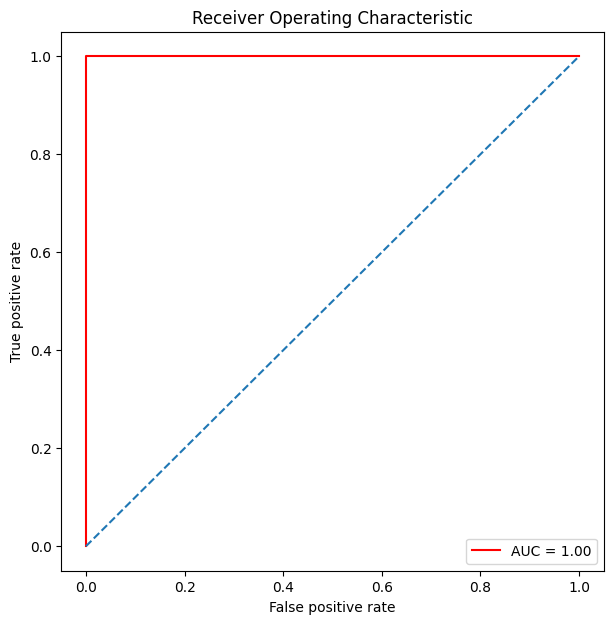

In [19]:
plot_roc(roc_auc)

##Linear Distriminat Analysis(LDA)

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [21]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train.ravel())

y_prob_lda = lda.predict_proba(X_test)[:,1]
y_pred_lda = np.where(y_prob_lda > 0.5, 1, 0)

In [22]:
lda_confusion_matrix = confusion_matrix(y_test, y_pred_lda)
lda_confusion_matrix

array([[843,   0],
       [  0, 782]])

In [23]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_lda)
roc_auc_lda = auc(false_positive_rate, true_positive_rate)
roc_auc_lda

1.0

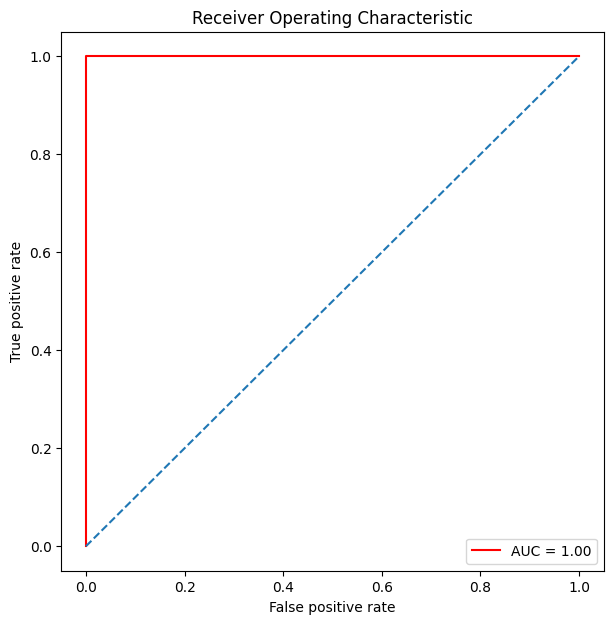

In [24]:
plot_roc(roc_auc_lda)

Quadratic Discriminant Analysis (QDA)

In [25]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [26]:
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train.ravel())

y_prob_qda = qda.predict_proba(X_test)[:,1]
y_pred_qda = np.where(y_prob_qda > 0.5, 1, 0)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [27]:
qda_confusion_matrix = confusion_matrix(y_test, y_pred_qda)
qda_confusion_matrix

array([[843,   0],
       [  0, 782]])

In [28]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_qda)
roc_auc_qda = auc(false_positive_rate, true_positive_rate)
roc_auc_qda


1.0

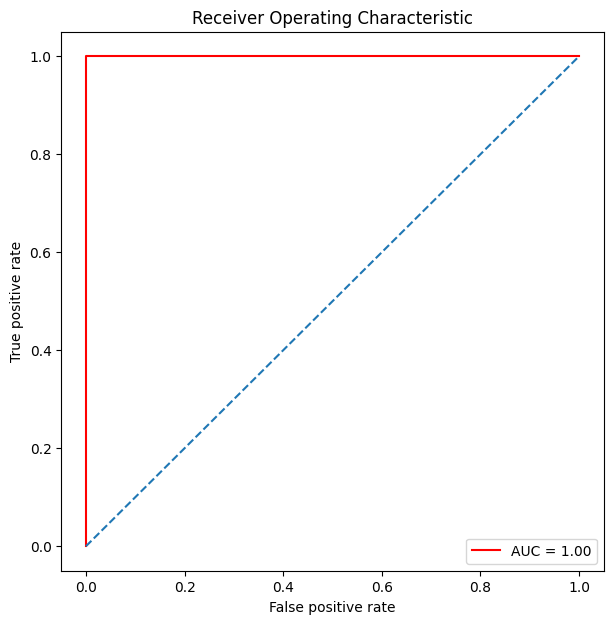

In [29]:
plot_roc(roc_auc_qda)